### **Introduction**

Let's start with a purely mathematical example:

$$\begin{align*} \max_{x} \quad & x + yx \\
\mathrm{s.t.} \quad & -x + 2yx \le 8 \\
& 2x+y \le 14 \\
& 2x-y \le 10
\end{align*} $$

Genetic algorithms can be used to solve MINLP 

#### **Genetic algrotihm package**

In [5]:
import numpy as np 
from geneticalgorithm2 import geneticalgorithm2 as ga


Set: Average time of function evaluating (secs): 0.0 (total = 0.0)

Best score before optimization: -10.098046444162064
||__________________ 10.6% GA is running...55 gen from 520...best value = -11.454068683024127

c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\geneticalgorithm2\selections.py:35: RuntimeWarning: invalid value encountered in subtract
  return (np.amax(normobj) + 1) - normobj


                                                                                                                                                                                                        
 The best found solution:
 [5.         1.29839534]

 Objective function:
 -11.491976704348545

 Used generations: 520
 Used time: 1.76 seconds


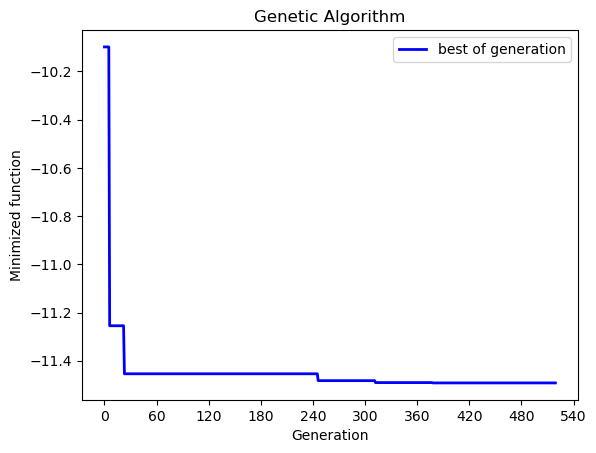

GAResult(last_generation=Generation(variables=array([[5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534],
       [5.        , 1.29839534

In [6]:
# Model

def f(vars):
    x = vars[0]
    y = vars[1]


    pen = 0
    if not -x + 2*x*y <= 8:
        pen = np.inf
    if not 2*x + y <= 14:
        pen = np.inf
    if not 2*x - y <= 10:
        pen = np.inf

    return -(x + y*x) + pen


varbounds = [[0, 10], [0, 10]]
vartype = ("int", "real")

model = ga(function=f, dimension=2, variable_type=vartype, variable_boundaries=varbounds)
model.run()

#### **Particle swarm**

In [7]:
from pyswarm import  pso

In [8]:
lb = np.array([0,0])
ub = np.array([10,10])
x0 = np.array([0,0])


def model_obj(vars):
    x = vars[0]
    y = vars[1]
    x = np.round(x, 0)
    return -(x + y*x)

def cons(vars):
    x = vars[0]
    y = vars[1]
    x = np.round(x, 0)
    c1 = 8 - (-x + 2*x*y)
    c2 = 14 - (2*x + y)
    c3 = 10 - (2*x - y)

    cons = [c1, c2, c3]

    return cons

xopt, fopt = pso(model_obj, lb, ub, x0, f_ieqcons=cons)
xopt, fopt

Stopping search: Swarm best objective change less than 1e-08


(array([4.74506894, 1.3       ]), -11.499999994693649)